In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta


from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor



from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


import random



from sklearn.linear_model import LinearRegression



import matplotlib.pyplot as plt
import matplotlib.dates as mdates



from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
import os







import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# define base model (neural network)
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, kernel_initializer='normal', activation='relu')) #, input_dim=2
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model




Ridge2=Ridge()
Ridge3=Ridge()
Ridge4=Ridge()

models=[Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), XGBRegressor(verbosity=0), LGBMRegressor() ,KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)]
#models=[Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), XGBRegressor(verbosity=0), LGBMRegressor() , Ridge2] # KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)]#, Ridge()]#
#models=[Ridge(), Lasso(), ElasticNet(), Ridge(), Lasso(), Ridge(), Ridge(), Ridge()] 
models=[ Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), XGBRegressor(verbosity=0), LGBMRegressor()]
#models=[Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor()]#, Ridge2, Ridge3 , Ridge4]
models=[ElasticNet()]


def data_change(data, lag, horizon, rolling_window):
  lagged_y=pd.concat([data.y.shift(lag).rename('{}_lag{}'.format(data.y.name, lag)) for lag in range(lag+1)], axis=1)
  lagged_y=lagged_y.drop(['y_lag0'], axis = 1) 

  dat_ML=pd.concat([data,lagged_y], axis = 1).dropna()

  dates_test=dat_ML.date[rolling_window-1+horizon:]

  dat_ML=dat_ML.drop(dat_ML.columns[[0]], axis=1) 
 
  y_train=dat_ML.y[horizon:]#y_train=dat_ML.y[:-horizon]
  X_train=dat_ML.drop(['y'], axis = 1)[:-horizon] #X_train=dat_ML.drop(['y'], axis = 1)[:-horizon] 
  y_test=dat_ML.y[rolling_window-1+horizon:] #y_test=dat_ML.y[rolling_window-1+horizon:]
  X_test=dat_ML.drop(['y'], axis = 1)[rolling_window-1:-horizon] #X_test=dat_ML.drop(['y'], axis = 1)[rolling_window-1+horizon:]

  return X_train, y_train, X_test, y_test, dates_test


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



'''
def forecasting(X_train, y_train, X_test, y_test, horizon, rolling_window, model, dates_test, normalize=False, expanding=False, hyper):
  prognozy=[]
  real=[]
  dates=[]
  for i, el in enumerate(y_train):
    #if i>0:
    #        break
    if i<=(len(y_train)-rolling_window-1):
    #if i=

     
          if i==(len(y_train)-rolling_window-1):
            print(i, end=' ')

          model_1=model

          if expanding==True:
            X_train_roll=X_train.iloc[0:(i+rolling_window),:]
            y_train_roll=y_train.iloc[0:(i+rolling_window)]
            X_test_roll=X_test.iloc[(i+1):(i+2),:]
            y_test_roll=y_test.iloc[i+1]


          if expanding==False:   

            X_train_roll=X_train.iloc[i:(i+rolling_window),:]
            y_train_roll=y_train.iloc[i:(i+rolling_window)]
            X_test_roll=X_test.iloc[(i+1):(i+2),:]
            y_test_roll=y_test.iloc[i+1]
          



          iscl='bhbh'
          if (normalize==True and model not in [iscl]):
            sc = StandardScaler()
            X_train_roll=sc.fit_transform(X_train_roll)
            X_test_roll = sc.transform(X_test_roll)

          model_1.fit(X_train_roll,y_train_roll)
          y_predicted=model_1.predict(X_test_roll)
          real.append(y_test_roll)
          prognozy.append(y_predicted)
          dates.append(dates_test.iloc[i+1])
          
          

          #print(X_train_roll)
          #print(X_test_roll)
          #print(y_train_roll)
          #print(y_test_roll)
          
          

  return prognozy, real, dates
'''

import warnings
warnings.filterwarnings('ignore')





def create_fulldataset(imput_data, freq_vect_1):
  dat_ML=pd.merge(freq_vect_1,imput_data,on='date', how='inner')
  #dat_ML=dat_ML.drop(dat_ML.columns[[0]], axis=1) 
  dat_ML.rename({'value': 'y'}, axis=1, inplace=True)

  return dat_ML


In [ ]:
def forecasting(X_train, y_train, X_test, y_test, horizon, rolling_window, model, dates_test, normalize=False, expanding=False, hyperparam_optimal=False):
  prognozy=[]
  real=[]
  dates=[]

  #[Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), XGBRegressor(verbosity=0), LGBMRegressor() , Ridge2] 
  # KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)]#, Ridge()]#

  if str(model).startswith('ElasticNet'):
          parameters = {
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "l1_ratio": np.arange(0.0, 1.0, 0.1)
          }

  if str(model).startswith('SVR'):
          parameters = {
        'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['auto', 1e-3, 1e-4],
        'C': [0.01, .1, 1, 10, 100, 1000]}

  if str(model).startswith('RandomForestRegressor'):
          parameters = {
        # Number of trees in random forest
#        "n_estimators" : [int(x) for x in np.linspace(start = 5, stop = 40, num = 5)],
        # Number of features to consider at every split
#        "max_features" : ['auto', 'sqrt'],
        # Maximum number of levels in tree
#        "max_depth" : [int(x) for x in np.linspace(10, 80, num = 5)],
        # Minimum number of samples required to split a node
        "min_samples_split" : [2, 5, 10],
        # Minimum number of samples required at each leaf node
 #       "min_samples_leaf" :  [1, 2, 4],
        # Method of selecting samples for training each tree
 #       "bootstrap" :  [True, False],
 #       "criterion": 'mse'
 }

 
  if str(model).startswith('XGBR'):
            parameters = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4], "objective":['reg:squarederror']}    #, "verbosity" : 0},


  if str(model).startswith('LGBMR'):
            parameters = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'metric':'rmse',
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4]
    }

  #KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)




  for i, el in enumerate(y_train):
    #if i>0:
    #        break
    if i<=(len(y_train)-rolling_window-1):
    #if i=

     
          if i==(len(y_train)-rolling_window-1):
            print(i, end=' ')

          model_1=model

          if expanding==True:
            X_train_roll=X_train.iloc[0:(i+rolling_window),:]
            y_train_roll=y_train.iloc[0:(i+rolling_window)]
            X_test_roll=X_test.iloc[(i+1):(i+2),:]
            y_test_roll=y_test.iloc[i+1]


          if expanding==False:   

            X_train_roll=X_train.iloc[i:(i+rolling_window),:]
            y_train_roll=y_train.iloc[i:(i+rolling_window)]
            X_test_roll=X_test.iloc[(i+1):(i+2),:]
            y_test_roll=y_test.iloc[i+1]
          



          iscl='bhbh'
          if (normalize==True and model not in [iscl]):
            sc = StandardScaler()
            X_train_roll=sc.fit_transform(X_train_roll)
            X_test_roll = sc.transform(X_test_roll)




          if hyperparam_optimal==True:

            best_params = hyperparameter_tune(model_1, parameters, 10, 3, X_train_roll, y_train_roll)         
            model_2=model_1.set_params(**best_params)
            model_2.fit(X_train_roll,y_train_roll)
            y_predicted=model_2.predict(X_test_roll)
            real.append(y_test_roll)
            prognozy.append(y_predicted)
            dates.append(dates_test.iloc[i+1])
            
            print(i,': hyperparametrs optimal', end=',')
          

          else:

            model_1.fit(X_train_roll,y_train_roll)
            y_predicted=model_1.predict(X_test_roll)
            real.append(y_test_roll)
            prognozy.append(y_predicted)
            dates.append(dates_test.iloc[i+1])




          #print(X_train_roll)
          #print(X_test_roll)
          #print(y_train_roll)
          #print(y_test_roll)
          
          

  return prognozy, real, dates

In [ ]:
def hyperparameter_tune(base_model, parameters, n_iter, kfold, X, y):
    start_time = time.time()
    
    # Arrange data into folds with approx equal proportion of classes within each fold
    k = 3
    
    optimal_model = RandomizedSearchCV(base_model,
                            param_distributions=parameters,
                            n_iter=n_iter,
                            cv=k,
                            n_jobs=-1,
                            random_state=2020) #, scoring='neg_mean_squared_error')
    
    


    
    optimal_model.fit(X, y)
    
    stop_time = time.time()

    #scores = cross_val_score(optimal_model, X, y, cv=k, scoring="accuracy")
    
    #print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    #print("====================")
    
    #print("Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}".format(scores.mean(), scores.std()))
    #print("Best Score: {:.3f}".format(optimal_model.best_score_))
    #print("Best Parameters: {}".format(optimal_model.best_params_))
    
    return optimal_model.best_params_

In [ ]:
!ls "/content/drive/My Drive/Disser/myvkr"

algo_based_rating_per_article.xlsx  freq_vect.xlsx
checkpoint_table.xlsx		    hand_index_month.tsv
clean_data.xlsx			    sent_index.csv
cleaned_data.xlsx		    sent_index_no.csv
CPI.xls				    table_of_articles_2000.xlsx
data_macro_v2.csv		    uncertainty_index-master.zip
data.xlsx			    words_all_full_rating.xlsx
freq_vect.csv


In [ ]:
df_macro = pd.read_csv('/content/drive/My Drive/Disser/myvkr/data_macro_v2.csv', sep='\t')

In [ ]:
df_macro['date'] = pd.to_datetime(df_macro.fielddate)
df_macro

,fielddate,CPI_M_CHI,WAG_M,WAG_C_M,IP2_EA_M,UNEMPL_M_SH,RTRD_M_DIRI,RTRD_M,INVFC_M,IM_T_M,USD,EUR,RTS_LAST_VALUE,RTS_CLOSE_MEAN,RTS_TRADING_VOLUME_MEAN,DEP_FIZ,IPOT_CNT,IPOT_VOLUME,IPOT_DEBT,date
0,1992-01,345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-01-01
1,1992-02,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-02-01
2,1992-03,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-03-01
3,1992-04,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-04-01
4,1992-05,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2020-02,100.3,267.5,47257.0,112.9,4.6,273.2,2628.9,NaN,18.7,63.979750,69.852565,1299.69,1506.338421,1.216467e+09,3.017356e+07,NaN,NaN,NaN,2020-02-01
338,2020-03,100.6,286.5,50948.0,120.1,4.7,301.0,2917.5,NaN,20.4,73.719442,81.492847,1014.44,1050.798095,1.837732e+09,3.082081e+07,NaN,NaN,NaN,2020-03-01
339,2020-04,100.8,274.2,49306.0,109.1,5.8,215.5,2110.0,NaN,17.6,74.763533,81.211672,1125.03,1086.733636,1.172953e+09,3.146570e+07,NaN,NaN,NaN,2020-04-01
340,2020-05,100.3,280.8,50747.0,103.1,6.1,230.0,2257.3,NaN,17.2,72.500294,78.967067,1219.76,1165.390526,1.075121e+09,3.148029e+07,NaN,NaN,NaN,2020-05-01


In [ ]:
def min_max_scaler(df, col):
    mx = df[col].max()
    mn = df[col].min()
    df[col] = 100*(df[col] - mn)/(mx - mn)
    pass

In [ ]:
#df_macro = pd.read_csv('data_macro/data_macro_v2.csv', sep='\t')

#df_macro.set_index('fielddate', inplace=True)
#df_macro.index = pd.to_datetime(df_macro.index)

# Для РТС и курса валют берём изменения в процентах
for col in ['RTS_LAST_VALUE', 'RTS_CLOSE_MEAN', 'RTS_TRADING_VOLUME_MEAN', 'USD', 'EUR']:
    df_macro[col + '_ret'] = df_macro[col].diff()
    df_macro.drop(col, axis=1, inplace=True)
    min_max_scaler(df_macro, col + '_ret')

for col in ['DEP_FIZ', 'CPI_M_CHI', 'IP2_EA_M', 'UNEMPL_M_SH', 'WAG_M', 'WAG_C_M', 
 'RTRD_M_DIRI', 'RTRD_M', 'INVFC_M', 'IM_T_M', 'IPOT_CNT', 'IPOT_VOLUME', 'IPOT_DEBT']:
    df_macro[col + '_diff_12'] = df_macro[col].diff(12)
    df_macro.drop(col, axis=1, inplace=True)
    min_max_scaler(df_macro, col + '_diff_12')

#df_macro = df_macro[df_macro.index >= '2004-01-01']
    
df_macro.head()

,fielddate,date,RTS_LAST_VALUE_ret,RTS_CLOSE_MEAN_ret,RTS_TRADING_VOLUME_MEAN_ret,USD_ret,EUR_ret,DEP_FIZ_diff_12,CPI_M_CHI_diff_12,IP2_EA_M_diff_12,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
0,1992-01,1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992-02,1992-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992-03,1992-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992-04,1992-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992-05,1992-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_macro.columns

Index(['fielddate', 'date', 'RTS_LAST_VALUE_ret', 'RTS_CLOSE_MEAN_ret',
       'RTS_TRADING_VOLUME_MEAN_ret', 'USD_ret', 'EUR_ret', 'DEP_FIZ_diff_12',
       'CPI_M_CHI_diff_12', 'IP2_EA_M_diff_12', 'UNEMPL_M_SH_diff_12',
       'WAG_M_diff_12', 'WAG_C_M_diff_12', 'RTRD_M_DIRI_diff_12',
       'RTRD_M_diff_12', 'INVFC_M_diff_12', 'IM_T_M_diff_12',
       'IPOT_CNT_diff_12', 'IPOT_VOLUME_diff_12', 'IPOT_DEBT_diff_12'],
      dtype='object')

In [ ]:
gdp=pd.read_excel('/content/drive/MyDrive/ceic/Gross Domestic Product MOF Estimate Monthly.xlsx', skiprows=26, header=None)
gdp = gdp.rename({0: 'date', 1: 'value'}, axis=1)

In [ ]:
def tempos(gdp):
  gdp['value']=(gdp.value)/gdp.value.diff(12)
  return gdp.dropna()

In [ ]:
USD=df_macro[['date', 'USD_ret']]
USD=USD.rename(columns={'USD_ret':'y'})
USD=USD.dropna().reset_index(drop=True)

In [ ]:
CPI=df_macro[['date','CPI_M_CHI_diff_12']]
CPI=CPI.rename(columns={'CPI_M_CHI_diff_12':'y'})
CPI=CPI.dropna().reset_index(drop=True)

In [ ]:
UNEMPL=df_macro[['date',  'UNEMPL_M_SH_diff_12']]
UNEMPL=UNEMPL.rename(columns={'UNEMPL_M_SH_diff_12':'y'})
UNEMPL=UNEMPL.dropna().reset_index(drop=True)

In [ ]:

IPP=df_macro[['date',  'IP2_EA_M_diff_12']]
IPP=IPP.rename(columns={'IP2_EA_M_diff_12':'y'})
IPP=IPP.dropna().reset_index(drop=True)

In [ ]:

RTS=df_macro[['date',  'RTS_TRADING_VOLUME_MEAN_ret']]
RTS=RTS.rename(columns={'RTS_TRADING_VOLUME_MEAN_ret':'y'})
RTS=RTS.dropna().reset_index(drop=True)

In [ ]:
gdp=tempos(gdp).reset_index(drop=True)
#CPI=tempos(CPI).reset_index(drop=True)
#Unempl=tempos(Unempl).reset_index(drop=True)

In [ ]:

myl=['RTS_LAST_VALUE_ret', 
     'RTS_CLOSE_MEAN_ret',
       'RTS_TRADING_VOLUME_MEAN_ret',
        'USD_ret', 'EUR_ret',
         'DEP_FIZ_diff_12',
       'CPI_M_CHI_diff_12', 
       'IP2_EA_M_diff_12', 
     'UNEMPL_M_SH_diff_12',
       'WAG_M_diff_12', 
     'WAG_C_M_diff_12', 
     'RTRD_M_DIRI_diff_12',
       'RTRD_M_diff_12',
      'INVFC_M_diff_12',
     'IM_T_M_diff_12',
       'IPOT_CNT_diff_12',
      'IPOT_VOLUME_diff_12',
      'IPOT_DEBT_diff_12']

In [ ]:
myl2=[]
for x in myl:
  
  name=df_macro[['date',  x]]
 
  name=name.rename(columns={x:'y'})
  name=name.dropna().reset_index(drop=True)
  vars()[x]=name
  

In [ ]:
CPI

,date,y
0,1993-01-01,0.000000
1,1993-02-01,79.937912
2,1993-03-01,81.102057
3,1993-04-01,83.818393
4,1993-05-01,87.310827
...,...,...
325,2020-02-01,84.943733
326,2020-03-01,85.098952
327,2020-04-01,85.176562
328,2020-05-01,84.982538


In [ ]:
IPOT_DEBT_diff_12

,date,y
0,2009-12-01,99.435984
1,2010-01-01,98.546093
2,2010-02-01,96.440434
3,2010-03-01,95.475340
4,2010-04-01,93.156608
...,...,...
104,2018-08-01,53.963778
105,2018-09-01,52.196528
106,2018-10-01,50.485680
107,2018-11-01,46.318230


In [ ]:
imput_data={'gdp':gdp, 'CPI':CPI,'Unempl':UNEMPL,'USD':USD, 'IPP':IPP, 'RTS':RTS}

In [ ]:
imput_data={'RTS_LAST_VALUE_ret':RTS_LAST_VALUE_ret, 
            'RTS_CLOSE_MEAN_ret':RTS_CLOSE_MEAN_ret,
       'RTS_TRADING_VOLUME_MEAN_ret':RTS_TRADING_VOLUME_MEAN_ret,
        'USD_ret':USD_ret, 'EUR_ret':EUR_ret, 
        'DEP_FIZ_diff_12':DEP_FIZ_diff_12,
       'CPI_M_CHI_diff_12':CPI_M_CHI_diff_12, 
       'IP2_EA_M_diff_12':IP2_EA_M_diff_12, 
       'UNEMPL_M_SH_diff_12':UNEMPL_M_SH_diff_12,
       'WAG_M_diff_12':WAG_M_diff_12, 
       'WAG_C_M_diff_12':WAG_C_M_diff_12, 
       'RTRD_M_DIRI_diff_12':RTRD_M_DIRI_diff_12,
       'RTRD_M_diff_12':RTRD_M_diff_12,
        'INVFC_M_diff_12':INVFC_M_diff_12,
         'IM_T_M_diff_12':IM_T_M_diff_12,
       'IPOT_CNT_diff_12':IPOT_CNT_diff_12, 
       'IPOT_VOLUME_diff_12':IPOT_VOLUME_diff_12, 
       'IPOT_DEBT_diff_12':IPOT_DEBT_diff_12}

In [ ]:
#freq_vect=pd.read_csv('/content/drive/My Drive/myvkr/freq_vect.csv')
myind=pd.read_excel("/content/drive/My Drive/Disser/Data/rbc_indexes.xlsx")

In [ ]:
myind.columns

Index(['text_diff', 'title_diff', 'text_descr_dolya', 'title_descr_dolya',
       'levada_IPN_fillna', 'PMI_proiz', 'date'],
      dtype='object')

In [ ]:
myind

,text_diff,title_diff,text_descr_dolya,title_descr_dolya,levada_IPN_fillna,PMI_proiz,date
0,5.857883,30.016942,33.417672,8.101852,NaN,NaN,2000-11-01
1,50.848685,37.231061,29.844961,19.444444,NaN,NaN,2000-12-01
2,37.903389,84.562332,39.372189,21.604938,NaN,NaN,2001-01-01
3,14.888005,7.964676,56.793405,44.444444,NaN,NaN,2001-02-01
4,22.611468,7.175517,46.177351,9.259259,NaN,NaN,2001-03-01
...,...,...,...,...,...,...,...
238,9.953527,33.009227,52.454352,20.315091,NaN,NaN,2020-09-01
239,13.522853,29.722297,55.272803,30.395913,NaN,NaN,2020-10-01
240,0.000000,36.722996,41.277634,25.115741,NaN,NaN,2020-11-01
241,27.920276,45.734234,43.302704,30.518186,NaN,NaN,2020-12-01


In [ ]:
def simple_prognozy_full(imput_data, freq_vect_1, horizon, rolling_window, model, make_plot=False, normalize=False, expanding=False, hyperparam_optimal=False ):
  dat_ML=create_fulldataset(imput_data, freq_vect_1)
  X_train, y_train, X_test, y_test, dates_test=data_change(dat_ML, lag=1, horizon=horizon, rolling_window=rolling_window)
  prognozy, real, dates =forecasting(X_train, y_train, X_test, y_test, horizon=horizon, rolling_window=rolling_window, model=model, dates_test=dates_test, normalize=normalize, expanding=expanding, hyperparam_optimal=hyperparam_optimal)
  rmse=np.sqrt(mean_squared_error(prognozy, real))
  print(rmse)

  if make_plot==True:
    plot_simple_prognozy_full(prognozy, real, dates, model=model)

  return (prognozy, real, dates, rmse, dates_test)



#prognozy, real, dates, rmse, dates_test=simple_prognozy_full(imput_data, freq_vect_1, horizon, rolling_window, model)

def plot_simple_prognozy_full(prognozy, real, dates, model): 

  df=pd.DataFrame(list(zip(prognozy, real, dates)), columns = ['prognozy', 'real', 'dates'])
  df=df.set_index('dates')
  plt.figure(figsize=(20, 7))
  plt.plot(df.prognozy, "g", label="prediction", linewidth=2.0)
  plt.plot(df.real, label="actual", linewidth=2.0)
  plt.legend(loc='best')

  rmse=np.sqrt(mean_squared_error(prognozy, real))
  plt.title(" RMSE error = {0:.2f}, {1}".format( rmse, str(model)[0:5]))

  plt.grid(True);

#plot_simple_prognozy_full(prognozy, real, dates)

In [ ]:
def all_prognozy_full(imput_data, freq_vect_1, horizon, rolling_window, models, make_plot_for_each=False , normalize=False, expanding=False, hyperparam_optimal=False):
  dat_ML=create_fulldataset(imput_data, freq_vect_1)


  RMSEs=[]
  y_predicts=pd.DataFrame()
  random.seed(3)
  for modell in models:
    print(str(modell)[0:5])

    prognozy, real, dates, rmse, dates_test=simple_prognozy_full(imput_data, freq_vect_1, horizon, rolling_window, model=modell, make_plot=make_plot_for_each , normalize=normalize, expanding=expanding, hyperparam_optimal=hyperparam_optimal)


    #prognozy, real, dates =forecasting(X_train, y_train, X_test, y_test, horizon=horizon, rolling_window=rolling_window, model=modell, dates_test=dates_test, normalize=False)
    y_predicts["{}".format(str(modell)[0:5])]=prognozy
    rmse=np.sqrt(mean_squared_error(prognozy, real))
    RMSEs.append(rmse)

    y_predicts['dates']=dates
    y_predicts=y_predicts.set_index('dates')
    y_predicts=y_predicts.rename(columns={'Ridge':'Ridge', 'Lasso': 'Lasso', 'Elast': 'Elastic Net', 
                                          'SVR(C':'SVR' , 'Rando':'Random Forest' , 'XGBRe': 'XGBR', 'LGBMR':'LGBMR' , '<tens': 'Neural Network' , 'Linea':'reg_ar1' })
  
  return y_predicts,RMSEs, real, dates




def plot_all_prognozy_full(y_predicts, real, dates): 


  df=pd.DataFrame(list(zip(real, dates)), columns = ['real', 'dates'])
  df=df.set_index('dates')
  plt.figure(figsize=(20, 7))
  #plt.plot(df.prognozy, "g", label="prediction", linewidth=2.0)
  plt.plot(df.real, "b",label="actual", linewidth=2.0)
  #plt.plot(df.real, label="actual", linewidth=2.0)
  #plt.plot(y_predicts[col], linewidth=2.0, label="prediction")  #label="{}".format(col))
  for i, col in enumerate(y_predicts.columns):
      plt.plot(y_predicts[col], linewidth=2.0 , label="{}".format(col))
      #plt.title(col)


  plt.legend(loc='best')

  #rmse=np.sqrt(mean_squared_error(prognozy, real))
  #plt.title("RMSE error = {0:.2f}".format(rmse))

  plt.grid(True)
  return None



def AR_model(imput_data, freq_vect_1, horizon, rolling_window, expanding=False):

  dat_ML=create_fulldataset(imput_data, freq_vect_1)
  X_train, y_train, X_test, y_test, dates_test=data_change(dat_ML, lag=1, horizon=horizon, rolling_window=rolling_window)

  prognozy_AR, real_AR, dates_AR =forecasting(pd.DataFrame(X_train.y_lag1), y_train, pd.DataFrame(X_test.y_lag1), y_test, horizon=horizon, rolling_window=rolling_window, model=LinearRegression(), dates_test=dates_test, expanding=expanding)
  
  rmse_AR=np.sqrt(mean_squared_error(prognozy_AR, real_AR))
  rmse_AR

  return prognozy_AR, real_AR, dates_AR, rmse_AR






def RMSE_improvements(RMSEs, rmse_AR, names):
  relative_imporovement=RMSEs/rmse_AR

  #y_predict_columns_renamed=['Ridge', 'Lasso', 'Elastic Net', 'SVR', 'Random Forest', 'XGBR', 'LGBMR', 'Neural Network']

  
  relative_imporovement=pd.DataFrame(relative_imporovement, index=names, columns=['RMSE/RMSE_AR'])
  return relative_imporovement


def bar_plot(relative_imporovement, name, error=0.000001):
  
  #error=0.000001
  #error=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01 ]
  fig, ax = plt.subplots()
  color_dict={'Ridge':'purple', 'Lasso':'orange', 'Elastic Net':'cyan', 'SVR':'blue', 'Random Forest':'yellow', 'XGBR':'red', 'LGBMR':'green', 'Neural Network':'black'}
  #ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'orange'], xerr=error)
  #ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple'], xerr=error)
  #ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , xerr=error, color=[color_dict[x] for x in relative_imporovement.index])
  ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , xerr=error, color='blue')



  plt.axvline(x=1)
  ax.set_xlabel('relative imporovement')
  ax.set_title('RMSE/RMSE_AR {}'.format(name))

  plt.show()

  return None

In [ ]:
#AR_model(imput_data['CPI'], myind[['date','title_diff']], horizon=9, rolling_window=36, expanding=True)[3]

KeyError: ignored

In [ ]:
%time
#result_1=simple_prognozy_full(imput_data['CPI'], myind[['date','title_diff']], horizon=9, rolling_window=36, model=LinearRegression(), make_plot=True, expanding=True)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


KeyError: ignored

In [ ]:
myind.columns

In [ ]:
%time
d = {}
models=[LinearRegression()]
#all_rmse=pd.DataFrame()
all_rmse={}
#horizon=3
rolling_window=24
#models=[ Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(n_estimators=5), XGBRegressor(verbosity=0), LGBMRegressor()]

inds=['text_diff', 'title_diff', 'text_descr_dolya', 'title_descr_dolya']
      # ,'levada_IPN_fillna', 'PMI_proiz']
#freq_vect_1=myind[['date','{}'.format(ind)]]

horizons=[3,6,9]
#imput_data={'gdp':gdp, 'CPI':CPI,'Unempl':Unempl}
#imput_data={'USD':USD, 'CPI':CPI,'Unempl':UNEMPL, 'gdp':gdp}
#imput_data={'gdp':gdp, 'CPI':CPI,'Unempl':UNEMPL,'USD':USD, 'IPP':IPP, 'RTS':RTS}

imput_data={'GDP':gdp,
           # 'RTS_LAST_VALUE_ret':RTS_LAST_VALUE_ret, 'RTS_CLOSE_MEAN_ret':RTS_CLOSE_MEAN_ret,
       #'RTS_TRADING_VOLUME_MEAN_ret':RTS_TRADING_VOLUME_MEAN_ret, 
       'USD_ret':USD_ret, 
       #'EUR_ret':EUR_ret, 
       'DEP_FIZ_diff_12':DEP_FIZ_diff_12,
       'CPI_M_CHI_diff_12':CPI_M_CHI_diff_12, 'IP2_EA_M_diff_12':IP2_EA_M_diff_12, 'UNEMPL_M_SH_diff_12':UNEMPL_M_SH_diff_12,
       'WAG_M_diff_12':WAG_M_diff_12, 'WAG_C_M_diff_12':WAG_C_M_diff_12, 'RTRD_M_DIRI_diff_12':RTRD_M_DIRI_diff_12,
       'RTRD_M_diff_12':RTRD_M_diff_12, 'INVFC_M_diff_12':INVFC_M_diff_12, 'IM_T_M_diff_12':IM_T_M_diff_12,
       'IPOT_CNT_diff_12':IPOT_CNT_diff_12, 
       'IPOT_VOLUME_diff_12':IPOT_VOLUME_diff_12, 
       'IPOT_DEBT_diff_12':IPOT_DEBT_diff_12}


imput_data={'GDP':gdp,
           # 'RTS_LAST_VALUE_ret':RTS_LAST_VALUE_ret, 'RTS_CLOSE_MEAN_ret':RTS_CLOSE_MEAN_ret,
       #'RTS_TRADING_VOLUME_MEAN_ret':RTS_TRADING_VOLUME_MEAN_ret, 
       'USD':USD_ret, 
       #'EUR_ret':EUR_ret, 
       'DEPOSIT':DEP_FIZ_diff_12,
       'CPI':CPI_M_CHI_diff_12, #'IP2_EA_M_diff_12':IP2_EA_M_diff_12, 
       'UNEMPL':UNEMPL_M_SH_diff_12,
       'WAGES':WAG_M_diff_12, #'WAG_C_M_diff_12':WAG_C_M_diff_12, 'RTRD_M_DIRI_diff_12':RTRD_M_DIRI_diff_12,
       #'RTRD_M_diff_12':RTRD_M_diff_12,# 'INVFC_M_diff_12':INVFC_M_diff_12, 
       'IMPORT':IM_T_M_diff_12,
       'MORTGAGE':IPOT_CNT_diff_12 }
       #'IPOT_VOLUME_diff_12':IPOT_VOLUME_diff_12, 
       #'IPOT_DEBT_diff_12':IPOT_DEBT_diff_12}
'''
'GDP',реальный ВВП
 'USD_ret',средние значения курса доллара (USD) за месяц.
'DEP_FIZ_diff_12',вклады (депозиты) физических лиц в рублях;
'CPI_M_CHI_diff_12',индекс потребительских цен;
'UNEMPL_M_SH_diff_12',показатель безработицы на конец месяца;
'WAG_M_diff_12',реальная заработная плата;

'IM_T_M_diff_12',импорт ($ млрд).
'IPOT_CNT_diff_12',количество предоставленных ипотечных кредитов
'''

all_dfs={}
df_rmse_DM=pd.DataFrame()


for ind in inds:
  for series in imput_data:
    for horizont in horizons:
      

      freq_vect_1=myind[['date','{}'.format(ind)]]
      result_t=all_prognozy_full(imput_data[series], freq_vect_1, horizon=horizont, rolling_window=rolling_window, models=models , make_plot_for_each=False, normalize=False, expanding=False)
      y_predicts_t, RMSE_t, real_t, dates_t=result_t
      #plot_all_prognozy_full(y_predicts_t, real_t, dates_t)
      #y_predicts["{}".format(str(modell)[0:5])]=prognozy

      prognozy_AR_1, real_AR_1, dates_AR_1, rmse_AR_1=AR_model(imput_data[series], freq_vect_1, horizont, rolling_window, expanding=False)

      df_rmse_DM=y_predicts_t
      df_rmse_DM["real"]=real_t
      df_rmse_DM["AR_1"]=prognozy_AR_1

      d[series+'_'+'h'+str(horizont)+'_'+ind] = df_rmse_DM

      print('df_rmse_DM_ok')

      relative_imporovement_1=RMSE_improvements(RMSE_t, rmse_AR_1, y_predicts_t.columns[:-2])
      print('relative imp OK')


      all_rmse[series+'_'+'h'+str(horizont)+'_'+ind]=relative_imporovement_1


    #bar_plot(relative_imporovement_1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs
Linea
205 105.07425920300447
205 df_rmse_DM_ok
relative imp OK
Linea
202 175.0325310130997
202 df_rmse_DM_ok
relative imp OK
Linea
199 90.04334792941236
199 df_rmse_DM_ok
relative imp OK
Linea
168 14.387699078703557
168 df_rmse_DM_ok
relative imp OK
Linea
165 15.72929723742858
165 df_rmse_DM_ok
relative imp OK
Linea
162 16.179093332163195
162 df_rmse_DM_ok
relative imp OK
Linea
67 19.004637697464013
67 df_rmse_DM_ok
relative imp OK
Linea
64 23.2240837201148
64 df_rmse_DM_ok
relative imp OK
Linea
61 23.466983767053392
61 df_rmse_DM_ok
relative imp OK
Linea
207 0.2490571399820809
207 df_rmse_DM_ok
relative imp OK
Linea
204 0.2520512777749785
204 df_rmse_DM_ok
relative imp OK
Linea
201 0.2683064795122411
201 df_rmse_DM_ok
relative imp OK
Linea
207 11.34677724702727
207 df_rmse_DM_ok
relative imp OK
Linea
204 15.056112617131273
204 df_rmse_DM_ok
relative imp OK
Linea
201 17.074489192058046
201 df_rmse_DM_ok
relative imp OK
Lin

In [ ]:
mylist=list(all_rmse.keys())
#res = [i for i in mylist if i.startswith('gdp')]

averaged_RMSE=pd.DataFrame()
sd_RMSE=pd.DataFrame()
sd_RMSE_all=[]

d_subset={}

count=0

for ind in inds:

  for data_name in list(imput_data.keys()):
    #length=len(all_rmse[res])
    #averaged_RMSE=pd.DataFrame([0]*length, columns=['{}_avg'.format(res)])
    d_subset={}
    #print(data_name)

    for k,v in all_rmse.items():
      if k.startswith(data_name) and ind in k:
        print(k)
        d_subset[k]=v
    #print(d_subset)
    new=sum(d_subset.values())/len(d_subset)
    new.columns=["avg_{0}_{1}".format(data_name, ind)]
    averaged_RMSE=pd.concat([averaged_RMSE,new], axis=1)
    
    #averaged_RMSE["RMSE/RMSEar_avg_{}".format(data_name)]=sum(d_subset.values())/len(d_subset)
    sd_RMSE=np.array(list(d_subset.values())).std(axis=0).tolist()
    sd_RMSE=[i for b in map(lambda x:[x] if not isinstance(x, list) else x, sd_RMSE) for i in b]
    sd_RMSE_all.append(sd_RMSE)
    

averaged_RMSE=averaged_RMSE.to_dict('series')
#averaged_RMSE
#sd_RMSE_all







GDP_h3_text_diff
GDP_h6_text_diff
GDP_h9_text_diff
USD_h3_text_diff
USD_h6_text_diff
USD_h9_text_diff
DEPOSIT_h3_text_diff
DEPOSIT_h6_text_diff
DEPOSIT_h9_text_diff
CPI_h3_text_diff
CPI_h6_text_diff
CPI_h9_text_diff
UNEMPL_h3_text_diff
UNEMPL_h6_text_diff
UNEMPL_h9_text_diff
WAGES_h3_text_diff
WAGES_h6_text_diff
WAGES_h9_text_diff
IMPORT_h3_text_diff
IMPORT_h6_text_diff
IMPORT_h9_text_diff
MORTGAGE_h3_text_diff
MORTGAGE_h6_text_diff
MORTGAGE_h9_text_diff
GDP_h3_title_diff
GDP_h6_title_diff
GDP_h9_title_diff
USD_h3_title_diff
USD_h6_title_diff
USD_h9_title_diff
DEPOSIT_h3_title_diff
DEPOSIT_h6_title_diff
DEPOSIT_h9_title_diff
CPI_h3_title_diff
CPI_h6_title_diff
CPI_h9_title_diff
UNEMPL_h3_title_diff
UNEMPL_h6_title_diff
UNEMPL_h9_title_diff
WAGES_h3_title_diff
WAGES_h6_title_diff
WAGES_h9_title_diff
IMPORT_h3_title_diff
IMPORT_h6_title_diff
IMPORT_h9_title_diff
MORTGAGE_h3_title_diff
MORTGAGE_h6_title_diff
MORTGAGE_h9_title_diff
GDP_h3_text_descr_dolya
GDP_h6_text_descr_dolya
GDP_h9_tex

In [ ]:
new_slovar={}
new_df11=pd.DataFrame()

#pd.DataFrame(relative_imporovement, index=names, columns=['RMSE/RMSE_AR'])

for data_name in list(imput_data.keys()):
  #length=len(all_rmse[res])
  #averaged_RMSE=pd.DataFrame([0]*length, columns=['{}_avg'.format(res)])
  #d_subset={}
  #print(data_name)
  new_d1=pd.DataFrame({'a':['-']})
  new_d1=pd.DataFrame()
  for k,v in averaged_RMSE.items():
    
    if data_name in k:
      print(k)
      s = pd.DataFrame(averaged_RMSE[k])
      s.columns = ['a']
      print(s)
      #s_new = s.rename(index={'reg_ar1': '{}'.format(k[-9:-1])})
      #new_d1=new_d1.append(s)
      #new_d1.columns=["avg_{}".format(data_name)]
      new_d1=new_d1.append(s)
    #new_d1=new_d1.reset_index()
    #new_d1=new_d1.drop('index',1)
    #new_d1['names']=pd.Series(['text_descr_dolya','text_diff','title_descr_dolya','title_diff'])
    #new_d1=new_d1.set_index('names', drop=True)
    
    new_slovar[data_name]=new_d1
    #print(new_d1)
  #print('---')


      #new_d1=pd.DataFrame(relative_imporovement, index=names, columns=['RMSE/RMSE_AR'])
      #new_slovar[k]=new_d1

avg_GDP_text_diff
                a
reg_ar1  1.034722
avg_GDP_title_diff
                a
reg_ar1  0.961744
avg_GDP_text_descr_dolya
                a
reg_ar1  1.063599
avg_GDP_title_descr_dolya
                a
reg_ar1  1.072672
avg_USD_text_diff
              a
reg_ar1  0.9974
avg_USD_title_diff
                a
reg_ar1  1.015609
avg_USD_text_descr_dolya
                a
reg_ar1  1.023082
avg_USD_title_descr_dolya
                a
reg_ar1  1.018946
avg_DEPOSIT_text_diff
                a
reg_ar1  0.896764
avg_DEPOSIT_title_diff
                a
reg_ar1  0.845636
avg_DEPOSIT_text_descr_dolya
                a
reg_ar1  0.957973
avg_DEPOSIT_title_descr_dolya
                a
reg_ar1  0.978035
avg_CPI_text_diff
                a
reg_ar1  1.033841
avg_CPI_title_diff
                a
reg_ar1  0.977556
avg_CPI_text_descr_dolya
                a
reg_ar1  1.028711
avg_CPI_title_descr_dolya
                a
reg_ar1  1.001046
avg_UNEMPL_text_diff
                a
reg_ar1  0.995785
avg

In [ ]:
sd_RMSE_all=[sd_RMSE_all[x:x+4] for x in range(0, len(sd_RMSE_all), 4)]

In [ ]:
sd_RMSE_all[1]

[[0.011584695574065442],
 [0.017313760617229487],
 [0.012945175621292208],
 [0.04930651166345699]]

In [ ]:
def bar_plot(relative_imporovement, name, error=0.000001):
  
  #error=0.000001
  #error=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01 ]
  fig, ax = plt.subplots()
  #color_dict={'Ridge':'purple', 'Lasso':'orange', 'Elastic Net':'cyan', 'SVR':'blue', 'Random Forest':'yellow', 'XGBR':'red', 'LGBMR':'green', 'Neural Network':'black'}
  #ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'orange'], xerr=error)
  #ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple'], xerr=error)
  ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , xerr=error)

  plt.axvline(x=1)
  ax.set_xlabel('relative imporovement')


  name1=['GDP',
 'USD_ret',
 'DEP_FIZ_diff_12',
 'CPI_M_CHI_diff_12',
 'IP2_EA_M_diff_12',
 'UNEMPL_M_SH_diff_12',
 'WAG_M_diff_12',
 'WAG_C_M_diff_12',
 'RTRD_M_DIRI_diff_12',
 'RTRD_M_diff_12',
 'INVFC_M_diff_12',
 'IM_T_M_diff_12',
 'IPOT_CNT_diff_12',
 'IPOT_VOLUME_diff_12',
 'IPOT_DEBT_diff_12']
  ax.set_title('RMSE/RMSE_AR {}'.format(name))

  plt.show()

  return None

In [ ]:
list(imput_data.keys())

['GDP', 'USD', 'DEPOSIT', 'CPI', 'UNEMPL', 'WAGES', 'IMPORT', 'MORTGAGE']

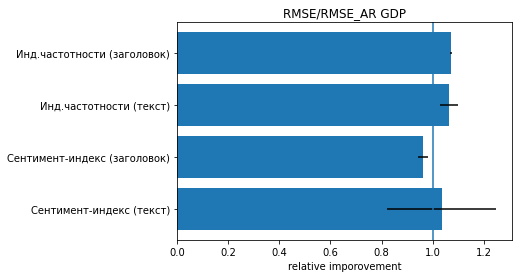

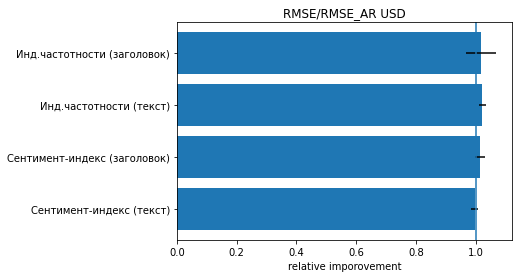

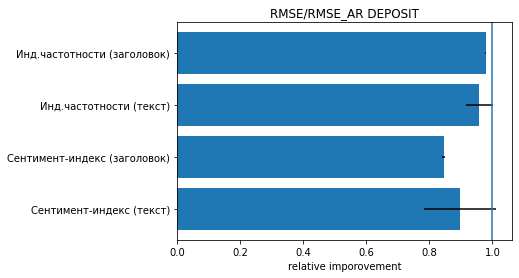

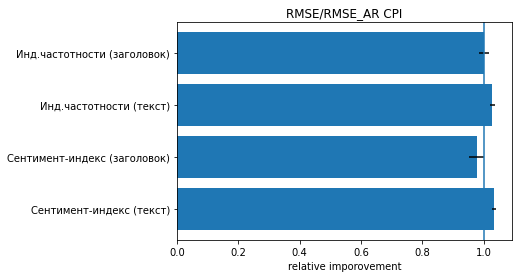

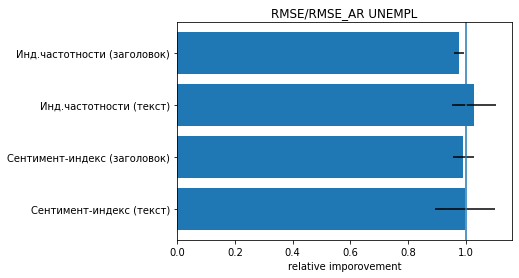

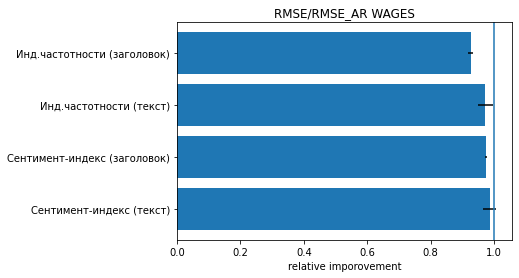

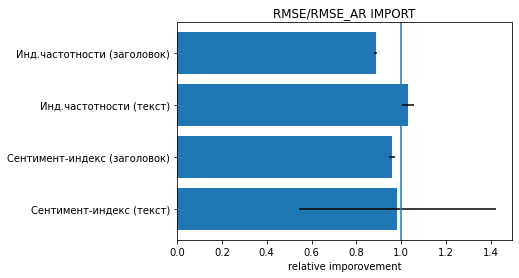

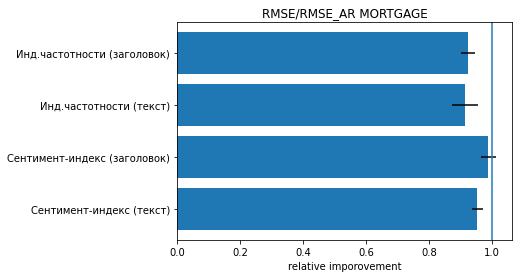

In [ ]:
for i,x in enumerate(new_slovar):
  ddd=pd.DataFrame(new_slovar[x])
  ddd['names']=['Сентимент-индекс (текст)','Сентимент-индекс (заголовок)','Инд.частотности (текст)','Инд.частотности (заголовок)']
  ddd=ddd.set_index('names', drop=True)
  ddd=ddd.rename(columns={ddd.columns[0]: 'RMSE/RMSE_AR'})
  ddd=ddd.rename(columns={ddd.columns[0]: 'RMSE/RMSE_AR'})
  #bar_plot(ddd, x, error=sd_RMSE_all[i])
  bar_plot(ddd, x, error=sd_RMSE_all[i])

In [ ]:
'''
'GDP',реальный ВВП
 'USD_ret',средние значения курса доллара (USD) за месяц.
'DEP_FIZ_diff_12',вклады (депозиты) физических лиц в рублях;
'CPI_M_CHI_diff_12',индекс потребительских цен;
'UNEMPL_M_SH_diff_12',показатель безработицы на конец месяца;
'WAG_M_diff_12',реальная заработная плата;

'IM_T_M_diff_12',импорт ($ млрд).
'IPOT_CNT_diff_12',количество предоставленных ипотечных кредитов
 






In [ ]:
list(imput_data.keys())

['GDP', 'USD', 'DEPOSIT', 'CPI', 'UNEMPL', 'WAGES', 'IMPORT', 'MORTGAGE']

In [ ]:

d

{'CPI_h3_text_descr_dolya':                         reg_ar1       real                 AR_1
 dates                                                          
 2003-03-01  [84.81660974955489]  84.982538  [84.86828286613925]
 2003-04-01   [84.8520906452334]  84.904928  [84.85495179777665]
 2003-05-01  [84.87650369408311]  84.633295  [84.87571515013234]
 2003-06-01  [84.78266462369045]  85.098952   [84.7816678831798]
 2003-07-01  [84.88895692501718]  84.982538  [84.83857801476192]
 ...                         ...        ...                  ...
 2020-02-01  [84.84474715176606]  84.943733  [84.92299058851897]
 2020-03-01  [84.93834924861174]  85.098952  [84.93991944656311]
 2020-04-01  [84.86211658383971]  85.176562  [84.90703571380783]
 2020-05-01  [84.92308750236867]  84.982538  [84.91343589065612]
 2020-06-01  [84.98222567540967]  85.060147  [84.97898551974936]
 
 [208 rows x 3 columns],
 'CPI_h3_text_diff':                         reg_ar1       real                 AR_1
 dates          

In [ ]:

def myf(ttt):
  fff=ttt
  fff['AR_1']=fff['AR_1'].map(lambda x: x[0])
  fff['reg_ar1']=fff['reg_ar1'].map(lambda x: x[0])
  return fff

#myf(ttt)

In [ ]:
d2=d.copy()

In [ ]:
d2['GDP_h3_text_diff']

,reg_ar1,real,AR_1
dates,,,
2003-03-01,[5.830371644433111],5.642452,[5.684002496834626]
2003-04-01,[5.653801810515993],5.173280,[5.694898907974125]
2003-05-01,[5.603560038541345],5.988751,[5.7445837872843395]
2003-06-01,[5.77631431130277],5.264966,[5.7387994756728915]
2003-07-01,[5.410950678813419],4.836272,[5.624246620412199]
...,...,...,...
2019-12-01,[10.008672480668793],12.993691,[10.60635686728194]
2020-01-01,[10.929466972379592],20.185475,[10.904358098932954]
2020-02-01,[11.32149009326353],18.961212,[11.208217558445963]


In [ ]:
d

{'CPI_h3_text_descr_dolya':                         reg_ar1       real                 AR_1
 dates                                                          
 2003-03-01  [84.81660974955489]  84.982538  [84.86828286613925]
 2003-04-01  [84.86982024277432]  84.904928  [84.88200801719836]
 2003-05-01  [84.88274338289766]  84.633295  [84.89906822674163]
 2003-06-01   [84.9246571122616]  85.098952  [84.86563719962355]
 2003-07-01    [85.009320381597]  84.982538   [84.8817778921246]
 ...                         ...        ...                  ...
 2020-02-01  [84.93215259765472]  84.943733  [84.94027255962641]
 2020-03-01  [84.94503542661721]  85.098952  [84.94512120830234]
 2020-04-01    [84.928710399077]  85.176562  [84.93621477949382]
 2020-05-01  [84.92586275080434]  84.982538  [84.92816049229911]
 2020-06-01  [84.95102056187966]  85.060147   [84.9519581031346]
 
 [208 rows x 3 columns],
 'CPI_h3_text_diff':                         reg_ar1       real                 AR_1
 dates          

In [ ]:
#dm_test(d2['GDP_h3_text_diff']['real'], myf(d2['GDP_h3_text_diff'])['reg_ar1'], d2['GDP_h3_text_diff']['AR_1'], h=3, crit="MSE", power = 2)

TypeError: ignored

In [ ]:
for x in list(d.keys()):
  if '3' in x:
    print(x)

GDP_h3_text_diff
USD_h3_text_diff
DEPOSIT_h3_text_diff
CPI_h3_text_diff
UNEMPL_h3_text_diff
WAGES_h3_text_diff
IMPORT_h3_text_diff
MORTGAGE_h3_text_diff
GDP_h3_title_diff
USD_h3_title_diff
DEPOSIT_h3_title_diff
CPI_h3_title_diff
UNEMPL_h3_title_diff
WAGES_h3_title_diff
IMPORT_h3_title_diff
MORTGAGE_h3_title_diff
GDP_h3_text_descr_dolya
USD_h3_text_descr_dolya
DEPOSIT_h3_text_descr_dolya
CPI_h3_text_descr_dolya
UNEMPL_h3_text_descr_dolya
WAGES_h3_text_descr_dolya
IMPORT_h3_text_descr_dolya
MORTGAGE_h3_text_descr_dolya
GDP_h3_title_descr_dolya
USD_h3_title_descr_dolya
DEPOSIT_h3_title_descr_dolya
CPI_h3_title_descr_dolya
UNEMPL_h3_title_descr_dolya
WAGES_h3_title_descr_dolya
IMPORT_h3_title_descr_dolya
MORTGAGE_h3_title_descr_dolya


In [ ]:
d

{'CPI_h3_text_descr_dolya':                         reg_ar1       real                 AR_1
 dates                                                          
 2003-03-01  [84.81660974955489]  84.982538  [84.86828286613925]
 2003-04-01   [84.8520906452334]  84.904928  [84.85495179777665]
 2003-05-01  [84.87650369408311]  84.633295  [84.87571515013234]
 2003-06-01  [84.78266462369045]  85.098952   [84.7816678831798]
 2003-07-01  [84.88895692501718]  84.982538  [84.83857801476192]
 ...                         ...        ...                  ...
 2020-02-01  [84.84474715176606]  84.943733  [84.92299058851897]
 2020-03-01  [84.93834924861174]  85.098952  [84.93991944656311]
 2020-04-01  [84.86211658383971]  85.176562  [84.90703571380783]
 2020-05-01  [84.92308750236867]  84.982538  [84.91343589065612]
 2020-06-01  [84.98222567540967]  85.060147  [84.97898551974936]
 
 [208 rows x 3 columns],
 'CPI_h3_text_diff':                         reg_ar1       real                 AR_1
 dates          

In [ ]:
v='USD_h3_text_diff'
#dm_test(d2[v]['real'], myf(d2[v])['reg_ar1'], d2[v]['AR_1'], h=3, crit="MSE", power = 2)

dm_return(DM=0.004962258219316119, p_value=0.9960465945142828)

In [ ]:
for x in list(d.keys()):
 # print(x)
 # if x=='GDP_h3_text_diff':
    
#  if '3' in x and x=='GDP_h3_text_diff':
#    dm1=dm_test(d2[x]['real'], d2[x]['reg_ar1'], d2[x]['AR_1'], h=3, crit="MSE", power = 2)

  if '3' in x: # and x!='GDP_h3_text_diff':
    dm1=dm_test(d2[x]['real'], myf(d2[x])['reg_ar1'], d2[x]['AR_1'], h=3, crit="MSE", power = 2)

  if '6' in x:
    dm1=dm_test(d2[x]['real'], myf(d2[x])['reg_ar1'], d2[x]['AR_1'], h=6, crit="MSE", power = 2)

  if '9' in x:
    dm1=dm_test(d2[x]['real'], myf(d2[x])['reg_ar1'], d2[x]['AR_1'], h=9, crit="MSE", power = 2)
  
  if dm1.p_value<0.1 and dm1.DM<0:
    
    print(x,dm1)


#dm_test(d['WAG_M_diff_12_h9_title_diff']['real'], d['WAG_M_diff_12_h9_title_diff']['reg_ar1'], d['WAG_M_diff_12_h9_title_diff']['AR_1'], h = 9, crit="MSE", power = 2)

CPI_h6_text_diff dm_return(DM=1.7406649369454723, p_value=0.08325011276608214)
DEPOSIT_h6_title_diff dm_return(DM=-1.7559245685432423, p_value=0.08388565610810102)
DEPOSIT_h9_title_diff dm_return(DM=-1.927690710017167, p_value=0.05855301187465876)
IMPORT_h6_title_diff dm_return(DM=-1.7069604324113539, p_value=0.08935845926319551)
MORTGAGE_h9_title_diff dm_return(DM=3.5970463890302997, p_value=0.0005781489235137764)
DEPOSIT_h9_text_descr_dolya dm_return(DM=-2.3103723353244856, p_value=0.02426503594349348)
CPI_h9_text_descr_dolya dm_return(DM=2.420241839435556, p_value=0.01639944150168678)
UNEMPL_h3_text_descr_dolya dm_return(DM=1.683080364552341, p_value=0.0938671067261532)
MORTGAGE_h6_text_descr_dolya dm_return(DM=-1.7791309158284694, p_value=0.07916469395413502)
USD_h9_title_descr_dolya dm_return(DM=2.0197103257200837, p_value=0.04506171421795888)
DEPOSIT_h9_title_descr_dolya dm_return(DM=-1.9390151165560836, p_value=0.05712904654455197)
UNEMPL_h9_title_descr_dolya dm_return(DM=-2.261

In [ ]:
dm1.p_value<0.1

False

In [ ]:
for x in list(d.keys()):
 # print(x)
 # if x=='GDP_h3_text_diff':
    
#  if '3' in x and x=='GDP_h3_text_diff':
#    dm1=dm_test(d2[x]['real'], d2[x]['reg_ar1'], d2[x]['AR_1'], h=3, crit="MSE", power = 2)

  if '3' in x: # and x!='GDP_h3_text_diff':
    dm1=dm_test(d2[x]['real'], d2[x]['reg_ar1'], d2[x]['AR_1'], h=1, crit="MSE", power = 2)

  if '6' in x:
    dm1=dm_test(d2[x]['real'], d2[x]['reg_ar1'], d2[x]['AR_1'], h=1, crit="MSE", power = 2)

  if '9' in x:
    dm1=dm_test(d2[x]['real'], d2[x]['reg_ar1'], d2[x]['AR_1'], h=1, crit="MSE", power = 2)
  
  if dm1.p_value<0.1 and dm1.DM<0:
    
    print(x,dm1)

DEPOSIT_h6_text_diff dm_return(DM=-2.487843465904995, p_value=0.015467179137075222)
DEPOSIT_h9_text_diff dm_return(DM=-2.821843830781599, p_value=0.0064365616485437685)
MORTGAGE_h6_text_diff dm_return(DM=-1.8421012194193702, p_value=0.06931036266688147)
MORTGAGE_h9_text_diff dm_return(DM=-3.1029439268860957, p_value=0.0027129941352181486)
DEPOSIT_h3_title_diff dm_return(DM=-2.286786210858787, p_value=0.025374489781281314)
DEPOSIT_h6_title_diff dm_return(DM=-3.299901403580125, p_value=0.0015833535310469916)
DEPOSIT_h9_title_diff dm_return(DM=-2.87441037819996, p_value=0.005565070803344145)
WAGES_h6_title_diff dm_return(DM=-1.7322451631078792, p_value=0.08474883264873123)
WAGES_h9_title_diff dm_return(DM=-2.116338889948024, p_value=0.035552605691438754)
IMPORT_h3_title_diff dm_return(DM=-1.805801145942556, p_value=0.0724091949392408)
IMPORT_h6_title_diff dm_return(DM=-2.3758765332275913, p_value=0.018437794791721477)
IMPORT_h9_title_diff dm_return(DM=-2.7615223340543964, p_value=0.006288

In [ ]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 3, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [ ]:
dm_test(actual_lst, pred1_lst, pred2_lst, h = 3, crit="MSE", power = 2)